# 📌 Merging Additional Datasets for Credit Risk Modeling

In this notebook, we will enrich our preprocessed train and test datasets by merging them with various additional datasets provided in the Home Credit Default Risk dataset. These datasets contain valuable historical and behavioral information about applicants which can improve our model’s performance.

---

## 🔄 Workflow Overview

### ✅ 1. Load Preprocessed Base Datasets
- Load cleaned and preprocessed versions of `application_train.csv` and `application_test.csv`.

### ✅ 2. Load Additional Datasets
- `bureau.csv`  
- `bureau_balance.csv`  
- `previous_application.csv`  
- `POS_CASH_balance.csv`  
- `installments_payments.csv`  
- `credit_card_balance.csv`

### ✅ 3. Aggregate Each Dataset
- Group by `SK_ID_CURR` and compute meaningful summary statistics (mean, sum, max, min, etc.)
- For `bureau_balance.csv`, join it with `bureau.csv` before aggregating

### ✅ 4. Merge with Main Datasets
- Merge each aggregated dataset with both **train** and **test** on `SK_ID_CURR` using a left join

### ✅ 5. Handle Missing Values (Optional)
- After merging, handle any new missing values introduced from the external datasets

### ✅ 6. Save Merged Datasets
- Save the final enriched `train` and `test` datasets to:
  - `data/processed/final_train.csv`
  - `data/processed/final_test.csv`

---

## 📁 Output
You’ll get fully enriched datasets that can be used for:
- Feature Engineering
- Model Training
- Model Evaluation

---


In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read all the datasets
train = pd.read_csv('train_preprocessed.csv')
test = pd.read_csv('test_preprocessed.csv')

In [3]:
bureau = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/bureau.csv')

In [2]:
bureau_balance = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/bureau_balance.csv')

In [3]:
previous_application = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/previous_application.csv')

In [6]:
pos_cash_balance = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/POS_CASH_balance.csv')

In [2]:
installments_payments = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/installments_payments.csv')

In [2]:
credit_card_balance = pd.read_csv('/home/saif/Desktop/Credit_risk_modeling/home-credit-default-risk/credit_card_balance.csv')

In [4]:
bureau.shape

(1716428, 17)

In [3]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,1.0,1.0,0.0,2.0,0.0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,is_outlier
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
2,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,0
3,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0.0,1.0,2.0,1.0,1.0,1.0,0
4,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,0


In [5]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [6]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [7]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [10]:
credit_card_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


# Handling missing values in all the dataset
- drop columns which have more than 40% missing values

In [3]:
# function to check % of missing values
def missing_values(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

## Bureau dataset

In [7]:
missing_values(bureau)

,Total,Percent
AMT_ANNUITY,1226791,0.714735
AMT_CREDIT_MAX_OVERDUE,1124488,0.655133
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_SUM_LIMIT,591780,0.344774
AMT_CREDIT_SUM_DEBT,257669,0.150119
DAYS_CREDIT_ENDDATE,105553,0.061496
AMT_CREDIT_SUM,13,0.000008
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


In [8]:
# Drop AMT_ANNUITY and AMT_CREDIT_MAX_OVERDUE
bureau = bureau.drop(['AMT_ANNUITY', 'AMT_CREDIT_MAX_OVERDUE'], axis=1)
missing_values(bureau)

,Total,Percent
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_SUM_LIMIT,591780,0.344774
AMT_CREDIT_SUM_DEBT,257669,0.150119
DAYS_CREDIT_ENDDATE,105553,0.061496
AMT_CREDIT_SUM,13,0.000008
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000


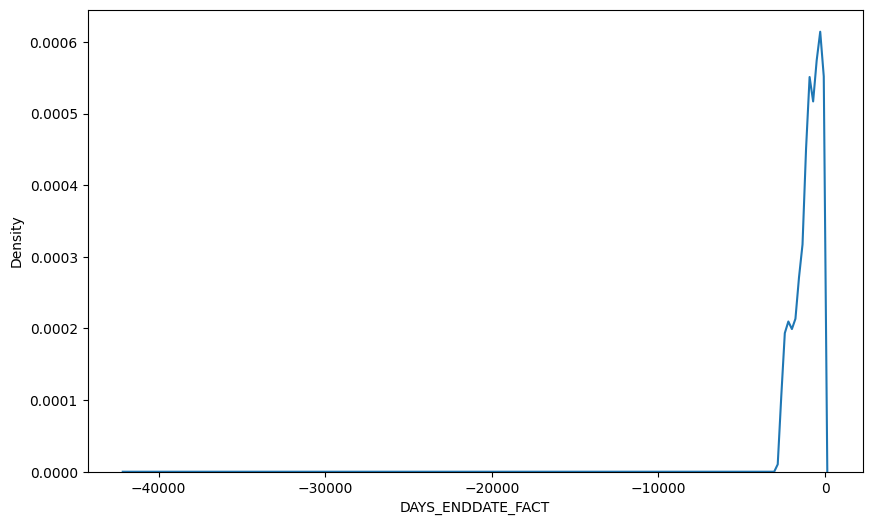

In [9]:
# Plot kde plot of DAYS_ENDDATE_FACT
plt.figure(figsize=(10,6))
sns.kdeplot(bureau['DAYS_ENDDATE_FACT'])
plt.show()

#### Filling missing values of DAYS_ENDDATE_FACT with Random Sampling Imputation
**Why Random Sampling Imputation ?**

Random sampling imputation is a technique used to fill missing values in a dataset by randomly selecting values from the existing data. 

Here are some reasons why you might want to use random sampling imputation:

- **Preserves data distribution**: Random sampling imputation helps to preserve the original distribution of the data. By randomly selecting values from the existing data, you are ensuring that the imputed values are similar to the existing values, which helps to maintain the overall distribution of the data.
- **Avoids bias**: Random sampling imputation avoids introducing bias into the data, which can occur when using other imputation methods such as mean or median imputation. By randomly selecting values, you are not introducing any systematic bias into the data.
- **Maintains variability**: Random sampling imputation helps to maintain the variability of the data. By introducing random values, you are ensuring that the imputed data has similar variability to the existing data.
- **Easy to implement**: Random sampling imputation is a simple and easy-to-implement technique. It does not require any complex calculations or modeling, making it a good choice for large datasets.
- **Robust to outliers**: Random sampling imputation is robust to outliers in the data. By randomly selecting values, you are less likely to introduce outliers into the imputed data.
- **Can be used for categorical data**: Random sampling imputation can be used for both numerical and categorical data. For categorical data, you can randomly select a category from the existing data.
- **Can be used for missing not at random (MNAR) data**: Random sampling imputation can be used for missing not at random (MNAR) data, where the missing values are not missing at random.

In [16]:
# Get the non-null values in the DAYS_ENDDATE_FACT column
non_null_values = bureau['DAYS_ENDDATE_FACT'].dropna().values
non_null_values

array([ -153., -1710.,  -840., ...,  -970., -1513.,  -387.])

In [17]:
# Get the indices of the missing values
missing_indices = bureau['DAYS_ENDDATE_FACT'].isnull()
missing_indices

0          False
1           True
2           True
3           True
4           True
           ...  
1716423     True
1716424    False
1716425    False
1716426    False
1716427    False
Name: DAYS_ENDDATE_FACT, Length: 1716428, dtype: bool

In [22]:
# Fill the missing values with random samples from the non-null values
np.put(bureau['DAYS_ENDDATE_FACT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(bureau[missing_indices])))

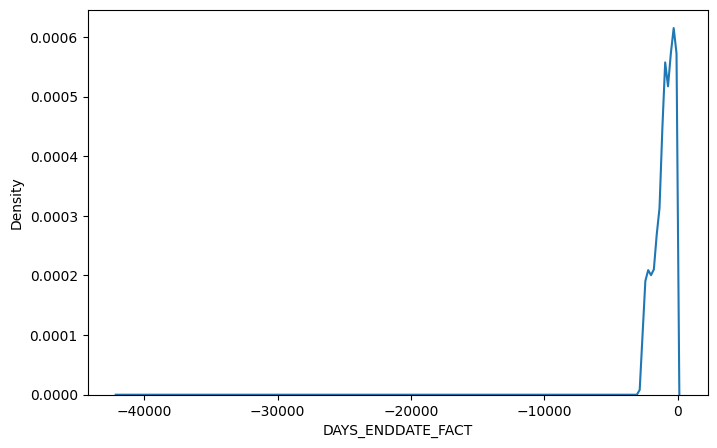

In [24]:
# Plot kde plot of DAYS_ENDDATE_FACT
plt.figure(figsize=(8,5))
sns.kdeplot(bureau['DAYS_ENDDATE_FACT'])
plt.show()

In [23]:
missing_values(bureau)

,Total,Percent
AMT_CREDIT_SUM_LIMIT,591780,0.344774
AMT_CREDIT_SUM_DEBT,257669,0.150119
DAYS_CREDIT_ENDDATE,105553,0.061496
AMT_CREDIT_SUM,13,0.000008
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000


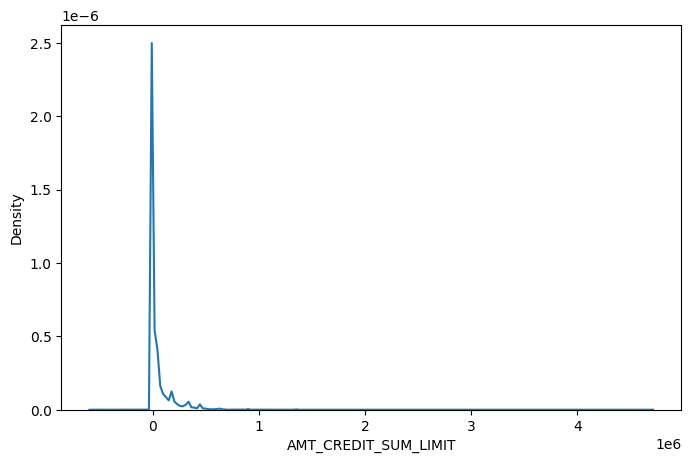

In [27]:
# plot kde plot of AMT_CREDIT_SUM_LIMIT
plt.figure(figsize=(8,5))
sns.kdeplot(bureau['AMT_CREDIT_SUM_LIMIT'])
plt.show()

In [28]:
bureau['AMT_CREDIT_SUM_LIMIT'].value_counts()

AMT_CREDIT_SUM_LIMIT
0.000          1050142
135000.000        2178
4500.000          1474
45000.000         1335
90000.000          974
                ...   
275075.100           1
20639.160            1
49464.000            1
1004866.920          1
135035.865           1
Name: count, Length: 51726, dtype: int64

In [29]:
bureau['AMT_CREDIT_SUM_LIMIT'].mode()

0    0.0
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

In [31]:
# Filling the missing values with the mode
bureau['AMT_CREDIT_SUM_LIMIT'].fillna(bureau['AMT_CREDIT_SUM_LIMIT'].mode()[0], inplace=True)

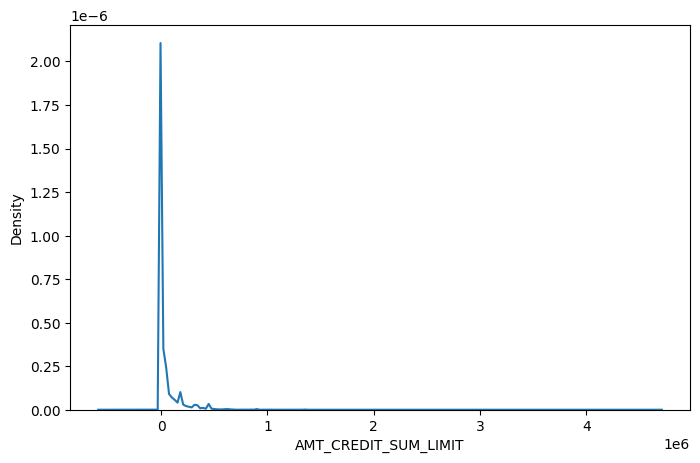

In [32]:
# plot kde plot of AMT_CREDIT_SUM_LIMIT
plt.figure(figsize=(8,5))
sns.kdeplot(bureau['AMT_CREDIT_SUM_LIMIT'])
plt.show()

In [33]:
bureau['AMT_CREDIT_SUM_LIMIT'].value_counts()

AMT_CREDIT_SUM_LIMIT
0.000          1641922
135000.000        2178
4500.000          1474
45000.000         1335
90000.000          974
                ...   
275075.100           1
20639.160            1
49464.000            1
1004866.920          1
135035.865           1
Name: count, Length: 51726, dtype: int64

In [34]:
missing_values(bureau)

,Total,Percent
AMT_CREDIT_SUM_DEBT,257669,0.150119
DAYS_CREDIT_ENDDATE,105553,0.061496
AMT_CREDIT_SUM,13,0.000008
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_ENDDATE_FACT,0,0.000000


In [35]:
bureau['AMT_CREDIT_SUM_DEBT'].value_counts()

AMT_CREDIT_SUM_DEBT
 0.000          1016434
 4.500              653
-450.000            543
 135000.000         344
 90000.000          320
                 ...   
 1396746.000          1
 650376.000           1
 477810.000           1
 312660.765           1
 1092226.500          1
Name: count, Length: 226537, dtype: int64

In [36]:
# filling the missing values of AMT_CREDIT_SUM_DEBT with mode
bureau['AMT_CREDIT_SUM_DEBT'].fillna(bureau['AMT_CREDIT_SUM_DEBT'].mode()[0], inplace=True)

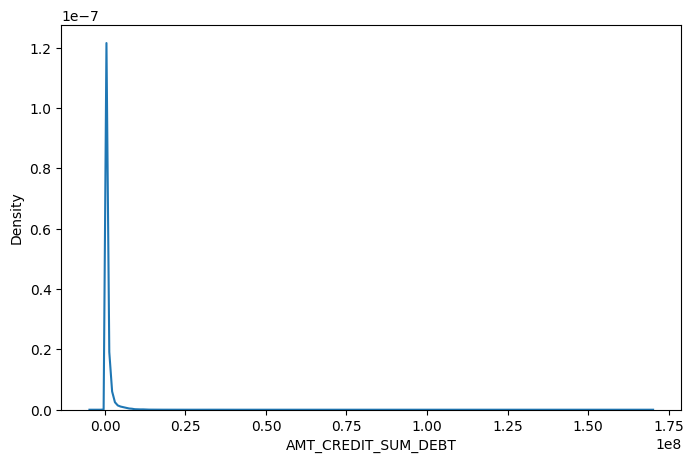

In [37]:
# plot kde plot of AMT_CREDIT_SUM_DEBT
plt.figure(figsize=(8,5))
sns.kdeplot(bureau['AMT_CREDIT_SUM_DEBT'])
plt.show()

In [38]:
bureau['AMT_CREDIT_SUM_DEBT'].value_counts()

AMT_CREDIT_SUM_DEBT
 0.000          1274103
 4.500              653
-450.000            543
 135000.000         344
 90000.000          320
                 ...   
 1396746.000          1
 650376.000           1
 477810.000           1
 312660.765           1
 1092226.500          1
Name: count, Length: 226537, dtype: int64

In [39]:
missing_values(bureau) 

,Total,Percent
DAYS_CREDIT_ENDDATE,105553,0.061496
AMT_CREDIT_SUM,13,0.000008
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_ENDDATE_FACT,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


In [56]:
# top 100 values of DAYS_CREDIT_ENDDATE value count 
bureau['DAYS_CREDIT_ENDDATE'].value_counts().head(2000)

DAYS_CREDIT_ENDDATE
 0.0       883
 3.0       845
-7.0       837
 1.0       830
-14.0      787
          ... 
-1322.0    332
-1561.0    332
 706.0     332
-1493.0    332
 581.0     332
Name: count, Length: 2000, dtype: int64

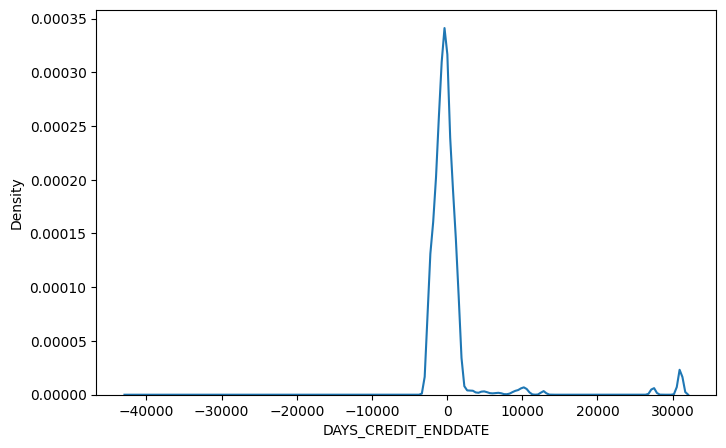

In [41]:
#plot kde plot of DAYS_CREDIT_ENDDATE
plt.figure(figsize=(8,5))
sns.kdeplot(bureau['DAYS_CREDIT_ENDDATE'])
plt.show()

**Filling missing values of DAYS_CREDIT_ENDDATE with random sampling imputation**

In [ ]:
# Get the non-null values in the DAYS_CREDIT_ENDDATE column
non_null_values = bureau['DAYS_CREDIT_ENDDATE'].dropna().values
non_null_values


array([ -153.,  1075.,   528., ..., -2433., -1628., -1513.])

In [60]:
# Get the indices of the missing values
missing_indices = bureau['DAYS_CREDIT_ENDDATE'].isnull()
missing_indices

0          False
1          False
2          False
3           True
4          False
           ...  
1716423    False
1716424    False
1716425    False
1716426    False
1716427     True
Name: DAYS_CREDIT_ENDDATE, Length: 1716428, dtype: bool

In [61]:
# Fill the missing values with random samples from the non-null values
np.put(bureau['DAYS_CREDIT_ENDDATE'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(bureau[missing_indices])))

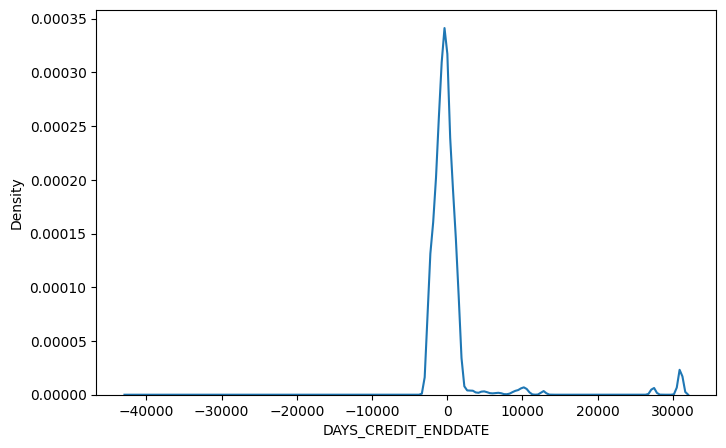

In [62]:
#plot kde plot of DAYS_CREDIT_ENDDATE
plt.figure(figsize=(8,5))
sns.kdeplot(bureau['DAYS_CREDIT_ENDDATE'])
plt.show()

In [63]:
missing_values(bureau)

,Total,Percent
AMT_CREDIT_SUM,13,0.000008
SK_ID_CURR,0,0.000000
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,0,0.000000
DAYS_ENDDATE_FACT,0,0.000000
CNT_CREDIT_PROLONG,0,0.000000


In [64]:
# Drop missing values of AMT_CREDIT_SUM
bureau = bureau.dropna(subset=['AMT_CREDIT_SUM'])
missing_values(bureau)

,Total,Percent
SK_ID_CURR,0,0.0
SK_ID_BUREAU,0,0.0
CREDIT_ACTIVE,0,0.0
CREDIT_CURRENCY,0,0.0
DAYS_CREDIT,0,0.0
CREDIT_DAY_OVERDUE,0,0.0
DAYS_CREDIT_ENDDATE,0,0.0
DAYS_ENDDATE_FACT,0,0.0
CNT_CREDIT_PROLONG,0,0.0
AMT_CREDIT_SUM,0,0.0


- **There is no missing values in the bureau dataset**

In [65]:
# Save the cleaned bureau data to a new CSV file
bureau.to_csv('cleaned_bureau_data.csv', index=False)

## bureau_balance dataset

In [4]:
missing_values(bureau_balance)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


- **Luckely there is no missing values in the bureau_balance dataset**

## previous_application dataset

In [5]:
previous_application.shape

(1670214, 37)

In [6]:
missing_values(previous_application)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,9.964370e-01
RATE_INTEREST_PRIMARY,1664263,9.964370e-01
AMT_DOWN_PAYMENT,895844,5.363648e-01
RATE_DOWN_PAYMENT,895844,5.363648e-01
NAME_TYPE_SUITE,820405,4.911975e-01
NFLAG_INSURED_ON_APPROVAL,673065,4.029813e-01
DAYS_TERMINATION,673065,4.029813e-01
DAYS_LAST_DUE,673065,4.029813e-01
DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
DAYS_FIRST_DUE,673065,4.029813e-01


In [7]:
# Dropping columns of previous_application with more than 40% missing values
previous_application = previous_application.drop(columns=['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE'])

In [8]:
missing_values(previous_application)

,Total,Percent
NFLAG_INSURED_ON_APPROVAL,673065,4.029813e-01
DAYS_LAST_DUE,673065,4.029813e-01
DAYS_FIRST_DRAWING,673065,4.029813e-01
DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
DAYS_FIRST_DUE,673065,4.029813e-01
DAYS_TERMINATION,673065,4.029813e-01
AMT_GOODS_PRICE,385515,2.308177e-01
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04


In [9]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

NFLAG_INSURED_ON_APPROVAL
0.0    665527
1.0    331622
Name: count, dtype: int64

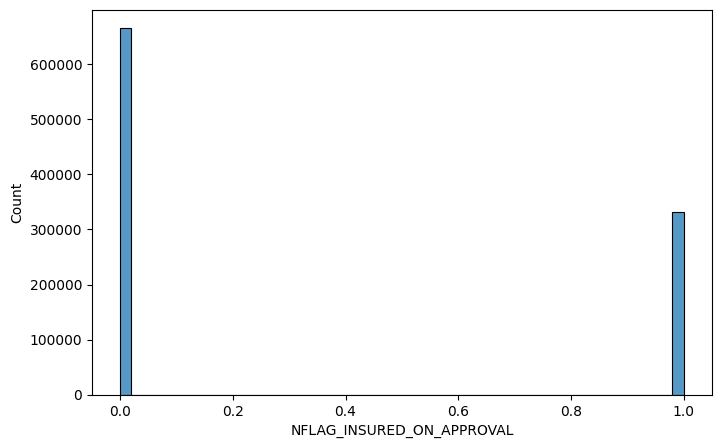

In [10]:
# plot histogram of NFLAG_INSURED_ON_APPROVAL
plt.figure(figsize=(8,5))
sns.histplot(previous_application['NFLAG_INSURED_ON_APPROVAL'])
plt.show()

In [11]:
# Filling missing values of NFLAG_INSURED_ON_APPROVAL with random sampling imputation
missing_indices = previous_application['NFLAG_INSURED_ON_APPROVAL'].isnull()
non_null_values = previous_application['NFLAG_INSURED_ON_APPROVAL'].dropna().values
np.put(previous_application['NFLAG_INSURED_ON_APPROVAL'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))


In [12]:
previous_application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

NFLAG_INSURED_ON_APPROVAL
0.0    1114477
1.0     555737
Name: count, dtype: int64

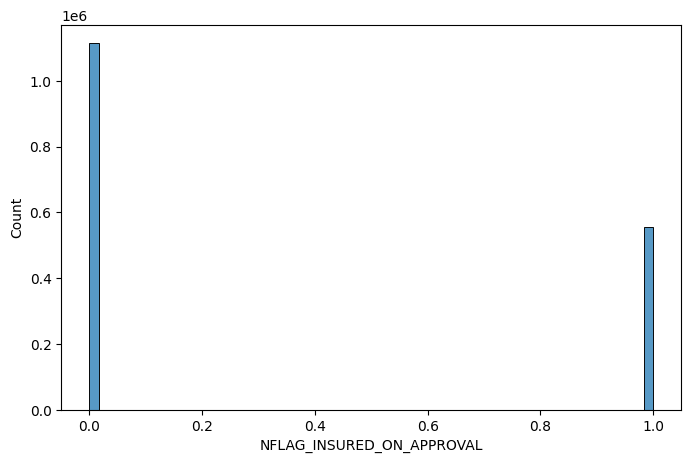

In [13]:
# plot histogram of NFLAG_INSURED_ON_APPROVAL
plt.figure(figsize=(8,5))
sns.histplot(previous_application['NFLAG_INSURED_ON_APPROVAL'])
plt.show()

In [14]:
missing_values(previous_application)

,Total,Percent
DAYS_FIRST_DUE,673065,4.029813e-01
DAYS_TERMINATION,673065,4.029813e-01
DAYS_LAST_DUE,673065,4.029813e-01
DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
DAYS_FIRST_DRAWING,673065,4.029813e-01
AMT_GOODS_PRICE,385515,2.308177e-01
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07


In [15]:
previous_application['DAYS_FIRST_DUE'].value_counts()

DAYS_FIRST_DUE
 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
             ...  
-2889.0         86
-2890.0         73
-2891.0         55
-2.0            14
-2892.0          9
Name: count, Length: 2892, dtype: int64

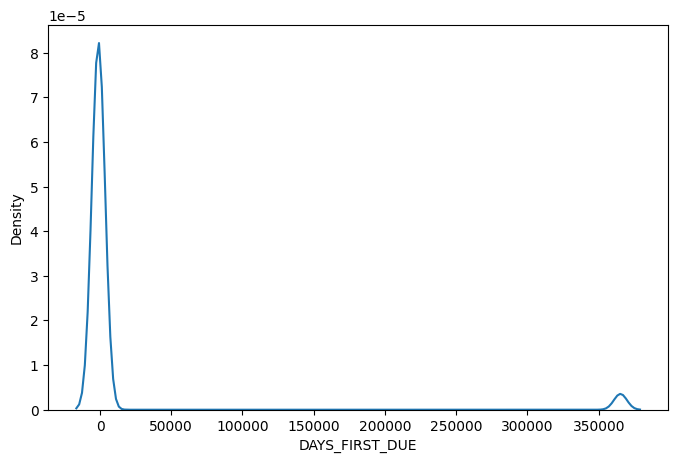

In [16]:
# Plot kde plot of DAYS_FIRST_DUE
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_FIRST_DUE'])
plt.show()

In [17]:
# filling missing values of DAYS_FIRST_DUE with random sampling imputation
missing_indices = previous_application['DAYS_FIRST_DUE'].isnull()
non_null_values = previous_application['DAYS_FIRST_DUE'].dropna().values
np.put(previous_application['DAYS_FIRST_DUE'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

In [18]:
previous_application['DAYS_FIRST_DUE'].value_counts()

DAYS_FIRST_DUE
 365243.0    68093
-334.0        1370
-330.0        1300
-509.0        1286
-299.0        1268
             ...  
-2887.0        135
-2890.0        113
-2891.0         84
-2.0            24
-2892.0         14
Name: count, Length: 2892, dtype: int64

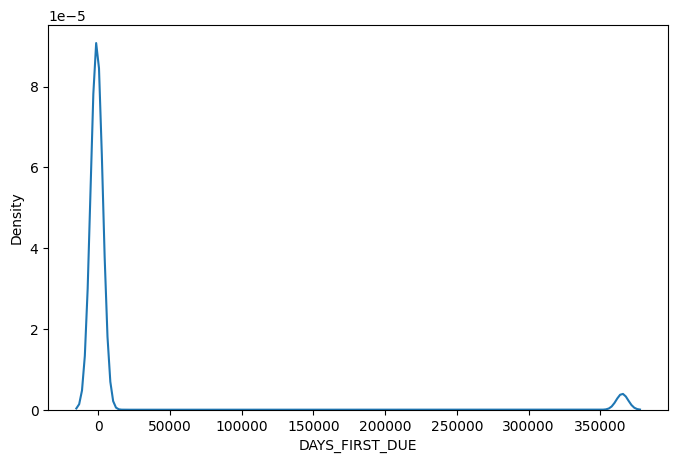

In [19]:
# Plot kde plot of DAYS_FIRST_DUE
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_FIRST_DUE'])
plt.show()

In [20]:
missing_values(previous_application)

,Total,Percent
DAYS_TERMINATION,673065,4.029813e-01
DAYS_LAST_DUE,673065,4.029813e-01
DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
DAYS_FIRST_DRAWING,673065,4.029813e-01
AMT_GOODS_PRICE,385515,2.308177e-01
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00


In [22]:
previous_application['DAYS_TERMINATION'].value_counts().head(100)

DAYS_TERMINATION
 365243.0    225913
-233.0          786
-170.0          770
-184.0          770
-163.0          769
              ...  
-248.0          675
-50.0           674
-220.0          674
-144.0          673
-65.0           673
Name: count, Length: 100, dtype: int64

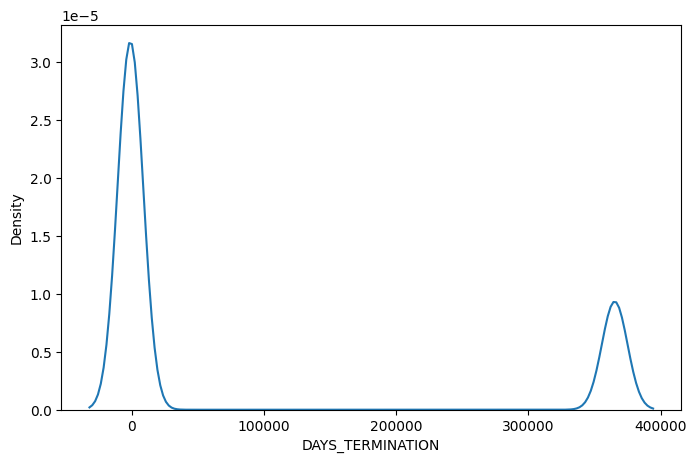

In [23]:
# kde plot of DAYS_TERMINATION
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_TERMINATION'])
plt.show()

In [24]:
# Filling missing values of DAYS_TERMINATION with random sampling imputation
missing_indices = previous_application['DAYS_TERMINATION'].isnull()
non_null_values = previous_application['DAYS_TERMINATION'].dropna().values
np.put(previous_application['DAYS_TERMINATION'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

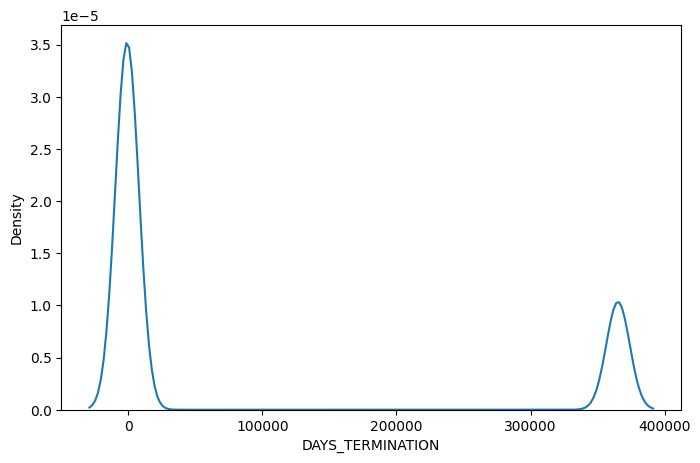

In [25]:
# kde plot of DAYS_TERMINATION
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_TERMINATION'])
plt.show()

In [26]:
missing_values(previous_application)

,Total,Percent
DAYS_LAST_DUE,673065,4.029813e-01
DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
DAYS_FIRST_DRAWING,673065,4.029813e-01
AMT_GOODS_PRICE,385515,2.308177e-01
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00
CHANNEL_TYPE,0,0.000000e+00


In [29]:
previous_application['DAYS_LAST_DUE'].value_counts().head(1000)

DAYS_LAST_DUE
 365243.0    211221
-245.0          658
-188.0          650
-239.0          642
-167.0          638
              ...  
-1021.0         291
-1001.0         291
-920.0          290
-1010.0         290
-1150.0         290
Name: count, Length: 1000, dtype: int64

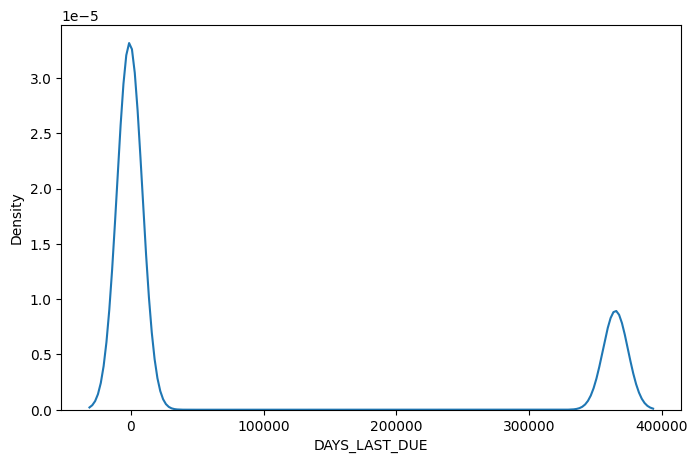

In [30]:
# kde plot of DAYS_LAST_DUE
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_LAST_DUE'])
plt.show()

In [31]:
# filling missing values of DAYS_LAST_DUE with random sampling imputation
missing_indices = previous_application['DAYS_LAST_DUE'].isnull()
non_null_values = previous_application['DAYS_LAST_DUE'].dropna().values
np.put(previous_application['DAYS_LAST_DUE'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

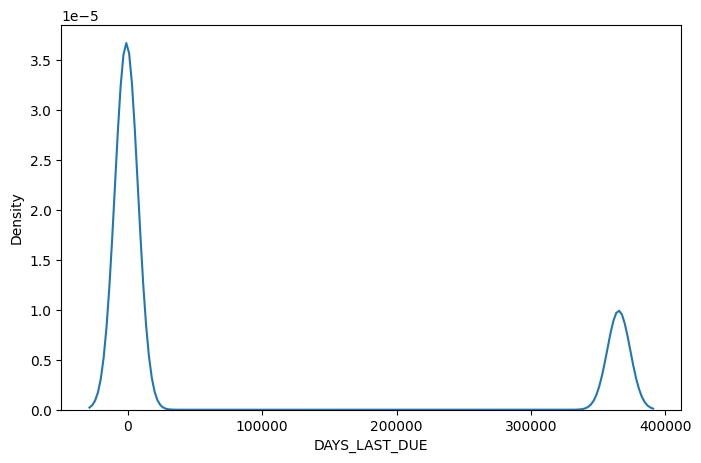

In [32]:
# kde plot of DAYS_LAST_DUE
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_LAST_DUE'])
plt.show()

In [33]:
missing_values(previous_application)

,Total,Percent
DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
DAYS_FIRST_DRAWING,673065,4.029813e-01
AMT_GOODS_PRICE,385515,2.308177e-01
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00
CHANNEL_TYPE,0,0.000000e+00
SELLERPLACE_AREA,0,0.000000e+00


In [35]:
previous_application['DAYS_LAST_DUE_1ST_VERSION'].value_counts().head(1000)

DAYS_LAST_DUE_1ST_VERSION
 365243.0    93864
 9.0           720
 8.0           706
 0.0           705
 5.0           702
             ...  
-806.0         291
 331.0         291
-717.0         290
-661.0         290
-656.0         290
Name: count, Length: 1000, dtype: int64

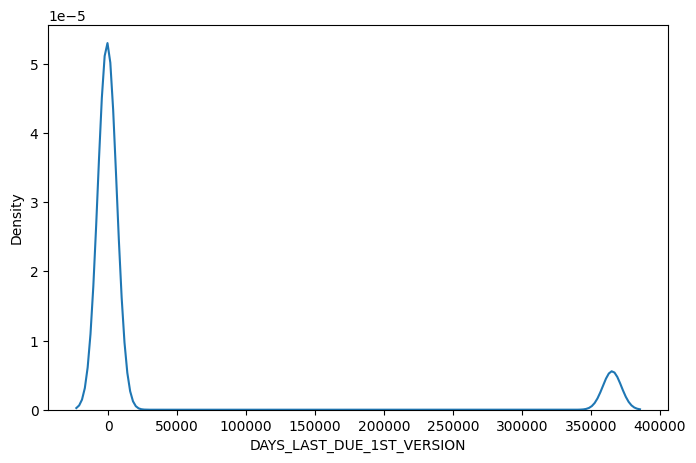

In [36]:
# kde plot of DAYS_LAST_DUE_1ST_VERSION
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_LAST_DUE_1ST_VERSION'])
plt.show()

In [37]:
# filling missing values of DAYS_LAST_DUE_1ST_VERSION with random sampling imputation
missing_indices = previous_application['DAYS_LAST_DUE_1ST_VERSION'].isnull()
non_null_values = previous_application['DAYS_LAST_DUE_1ST_VERSION'].dropna().values
np.put(previous_application['DAYS_LAST_DUE_1ST_VERSION'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

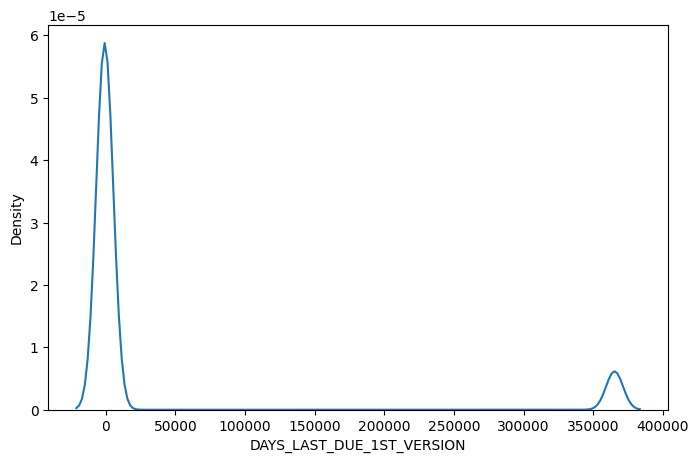

In [38]:
# kde plot of DAYS_LAST_DUE_1ST_VERSION
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_LAST_DUE_1ST_VERSION'])
plt.show()

In [39]:
missing_values(previous_application)

,Total,Percent
DAYS_FIRST_DRAWING,673065,4.029813e-01
AMT_GOODS_PRICE,385515,2.308177e-01
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00
NAME_YIELD_GROUP,0,0.000000e+00
CHANNEL_TYPE,0,0.000000e+00
SELLERPLACE_AREA,0,0.000000e+00


In [41]:
previous_application['DAYS_FIRST_DRAWING'].value_counts().head(100)

DAYS_FIRST_DRAWING
 365243.0    934444
-228.0          123
-224.0          121
-212.0          121
-223.0          119
              ...  
-218.0           86
-260.0           86
-281.0           86
-206.0           86
-335.0           86
Name: count, Length: 100, dtype: int64

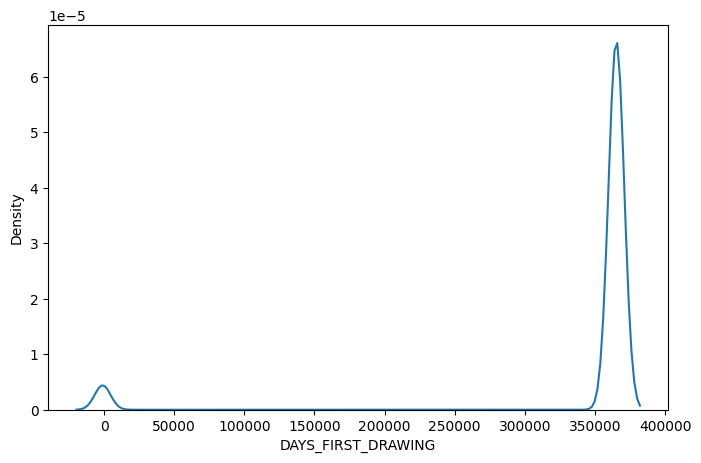

In [42]:
# kde plot of DAYS_FIRST_DRAWING
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_FIRST_DRAWING'])
plt.show()

In [43]:
# filling missing values of DAYS_FIRST_DRAWING with random sampling imputation
missing_indices = previous_application['DAYS_FIRST_DRAWING'].isnull()
non_null_values = previous_application['DAYS_FIRST_DRAWING'].dropna().values
np.put(previous_application['DAYS_FIRST_DRAWING'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

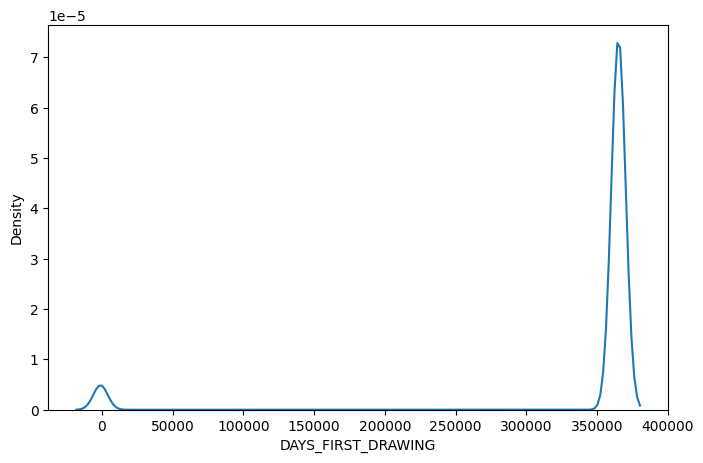

In [44]:
# kde plot of DAYS_FIRST_DRAWING
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['DAYS_FIRST_DRAWING'])
plt.show()

In [45]:
missing_values(previous_application)

,Total,Percent
AMT_GOODS_PRICE,385515,2.308177e-01
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00
CHANNEL_TYPE,0,0.000000e+00
SELLERPLACE_AREA,0,0.000000e+00
NAME_SELLER_INDUSTRY,0,0.000000e+00
NAME_YIELD_GROUP,0,0.000000e+00


In [48]:
previous_application['AMT_GOODS_PRICE'].value_counts().head(100)

AMT_GOODS_PRICE
45000.0     47831
225000.0    43549
135000.0    40666
450000.0    38926
90000.0     29367
            ...  
20205.0       875
904500.0      872
166500.0      870
63000.0       859
108000.0      848
Name: count, Length: 100, dtype: int64

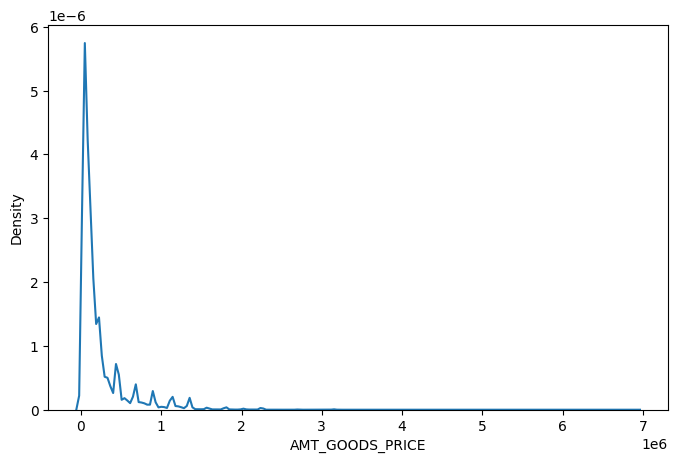

In [51]:
# kde plot of AMT_GOODS_PRICE
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

In [52]:
# filling missing values of AMT_GOODS_PRICE with random sampling imputation
missing_indices = previous_application['AMT_GOODS_PRICE'].isnull()
non_null_values = previous_application['AMT_GOODS_PRICE'].dropna().values
np.put(previous_application['AMT_GOODS_PRICE'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

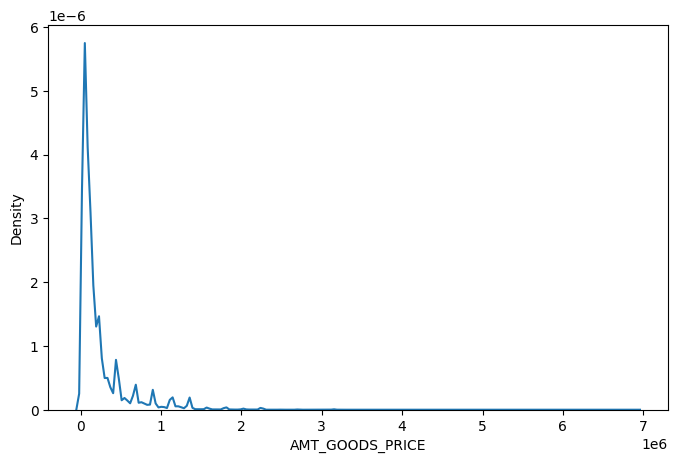

In [53]:
# kde plot of AMT_GOODS_PRICE
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

In [54]:
missing_values(previous_application)

,Total,Percent
AMT_ANNUITY,372235,2.228667e-01
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00
NAME_YIELD_GROUP,0,0.000000e+00
NAME_PRODUCT_TYPE,0,0.000000e+00
CHANNEL_TYPE,0,0.000000e+00
SELLERPLACE_AREA,0,0.000000e+00
NAME_SELLER_INDUSTRY,0,0.000000e+00


In [55]:
previous_application['AMT_ANNUITY'].value_counts().head(100)

AMT_ANNUITY
2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
25540.245      315
27580.320      314
14202.360      311
16591.500      310
20254.365      307
Name: count, Length: 100, dtype: int64

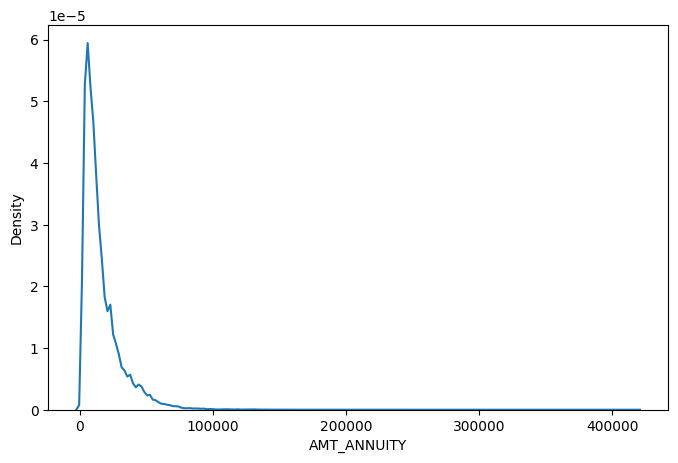

In [56]:
# kde plot of AMT_ANNUITY
plt.figure(figsize=(8,5))
sns.kdeplot(previous_application['AMT_ANNUITY'])
plt.show()

In [57]:
# filling missing values of AMT_ANNUITY with random sampling imputation
missing_indices = previous_application['AMT_ANNUITY'].isnull()
non_null_values = previous_application['AMT_ANNUITY'].dropna().values
np.put(previous_application['AMT_ANNUITY'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

In [58]:
missing_values(previous_application)

,Total,Percent
CNT_PAYMENT,372230,2.228637e-01
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00
NAME_GOODS_CATEGORY,0,0.000000e+00
DAYS_TERMINATION,0,0.000000e+00
DAYS_LAST_DUE,0,0.000000e+00
DAYS_LAST_DUE_1ST_VERSION,0,0.000000e+00
DAYS_FIRST_DUE,0,0.000000e+00
DAYS_FIRST_DRAWING,0,0.000000e+00


In [59]:
previous_application['CNT_PAYMENT'].value_counts().head(100)

CNT_PAYMENT
12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: count, dtype: int64

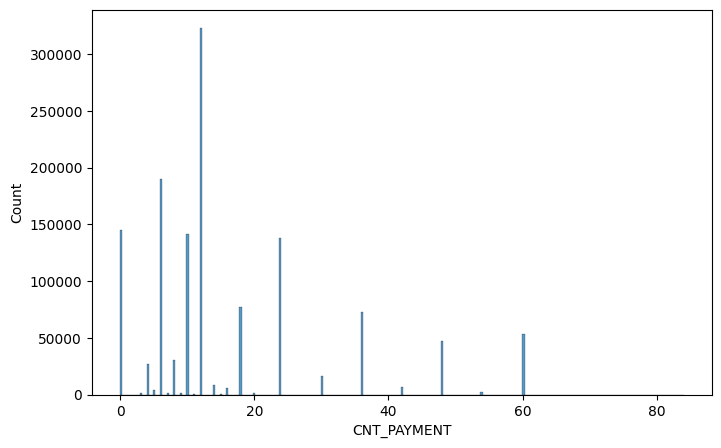

In [61]:
# histogram of CNT_PAYMENT
plt.figure(figsize=(8,5))
sns.histplot(previous_application['CNT_PAYMENT'])
plt.show()

In [62]:
# filling missing values of CNT_PAYMENT with random sampling imputation
missing_indices = previous_application['CNT_PAYMENT'].isnull()
non_null_values = previous_application['CNT_PAYMENT'].dropna().values
np.put(previous_application['CNT_PAYMENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(previous_application[missing_indices])))

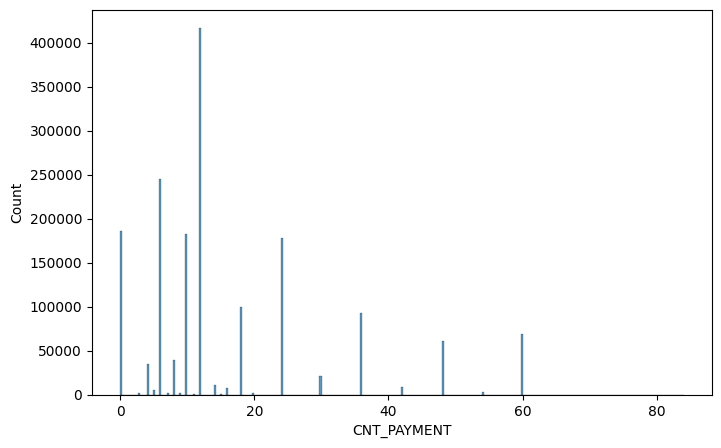

In [63]:
# histogram of CNT_PAYMENT
plt.figure(figsize=(8,5))
sns.histplot(previous_application['CNT_PAYMENT'])
plt.show()

In [64]:
missing_values(previous_application)

,Total,Percent
PRODUCT_COMBINATION,346,2.071591e-04
AMT_CREDIT,1,5.987257e-07
SK_ID_PREV,0,0.000000e+00
NAME_GOODS_CATEGORY,0,0.000000e+00
DAYS_TERMINATION,0,0.000000e+00
DAYS_LAST_DUE,0,0.000000e+00
DAYS_LAST_DUE_1ST_VERSION,0,0.000000e+00
DAYS_FIRST_DUE,0,0.000000e+00
DAYS_FIRST_DRAWING,0,0.000000e+00
NAME_YIELD_GROUP,0,0.000000e+00


In [65]:
# drop missing values of PRODUCT_COMBINATION and AMT_CREDIT
previous_application = previous_application.dropna(subset=['PRODUCT_COMBINATION', 'AMT_CREDIT'])

In [66]:
missing_values(previous_application)

,Total,Percent
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
DAYS_TERMINATION,0,0.0
DAYS_LAST_DUE,0,0.0
DAYS_LAST_DUE_1ST_VERSION,0,0.0
DAYS_FIRST_DUE,0,0.0
DAYS_FIRST_DRAWING,0,0.0
PRODUCT_COMBINATION,0,0.0
NAME_YIELD_GROUP,0,0.0
CNT_PAYMENT,0,0.0


- **Now There is no missing values in the previous_application dataset**

In [67]:
# save the cleaned previous application data to a new CSV file
previous_application.to_csv('cleaned_previous_application_data.csv', index=False)

## POS_CASH_balance dataset

In [7]:
pos_cash_balance.shape

(10001358, 8)

In [8]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
missing_values(pos_cash_balance)

,Total,Percent
CNT_INSTALMENT_FUTURE,26087,0.002608
CNT_INSTALMENT,26071,0.002607
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000


In [14]:
# drop the missing values of CNT_INSTALMENT_FUTURE and CNT_INSTALMENT
pos_cash_balance = pos_cash_balance.dropna(subset=['CNT_INSTALMENT_FUTURE', 'CNT_INSTALMENT'])
missing_values(pos_cash_balance)

,Total,Percent
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
MONTHS_BALANCE,0,0.0
CNT_INSTALMENT,0,0.0
CNT_INSTALMENT_FUTURE,0,0.0
NAME_CONTRACT_STATUS,0,0.0
SK_DPD,0,0.0
SK_DPD_DEF,0,0.0


- **There is no missing values in the pos_cash_balance dataset**

In [15]:
# save the cleaned pos cash balance data to a new CSV file
pos_cash_balance.to_csv('cleaned_pos_cash_balance_data.csv', index=False)

## installments_payments dataset

In [4]:
installments_payments.shape

(13605401, 8)

In [5]:
missing_values(installments_payments)

,Total,Percent
DAYS_ENTRY_PAYMENT,2905,0.000214
AMT_PAYMENT,2905,0.000214
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
NUM_INSTALMENT_VERSION,0,0.000000
NUM_INSTALMENT_NUMBER,0,0.000000
DAYS_INSTALMENT,0,0.000000
AMT_INSTALMENT,0,0.000000


In [6]:
# Drop missing values of DAYS_ENTRY_PAYMENT and AMT_PAYMENT
installments_payments = installments_payments.dropna(subset=['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT'])
missing_values(installments_payments)

,Total,Percent
SK_ID_PREV,0,0.0
SK_ID_CURR,0,0.0
NUM_INSTALMENT_VERSION,0,0.0
NUM_INSTALMENT_NUMBER,0,0.0
DAYS_INSTALMENT,0,0.0
DAYS_ENTRY_PAYMENT,0,0.0
AMT_INSTALMENT,0,0.0
AMT_PAYMENT,0,0.0


- **There is no missing values in the installments_payments dataset**

In [7]:
# save the cleaned installments payments data to a new CSV file
installments_payments.to_csv('cleaned_installments_payments_data.csv', index=False)

## credit_card_balance dataset

In [4]:
credit_card_balance.shape

(3840312, 23)

In [5]:
missing_values(credit_card_balance)

,Total,Percent
AMT_PAYMENT_CURRENT,767988,0.199981
AMT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_OTHER_CURRENT,749816,0.195249
CNT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000


In [8]:
credit_card_balance['AMT_PAYMENT_CURRENT'].value_counts().head(100)

AMT_PAYMENT_CURRENT
0.00         390507
9000.00      257297
4500.00      143572
6750.00      128296
13500.00     100454
              ...  
0.27           1113
8865.00        1107
0.09           1094
17775.00       1082
112500.00      1050
Name: count, Length: 100, dtype: int64

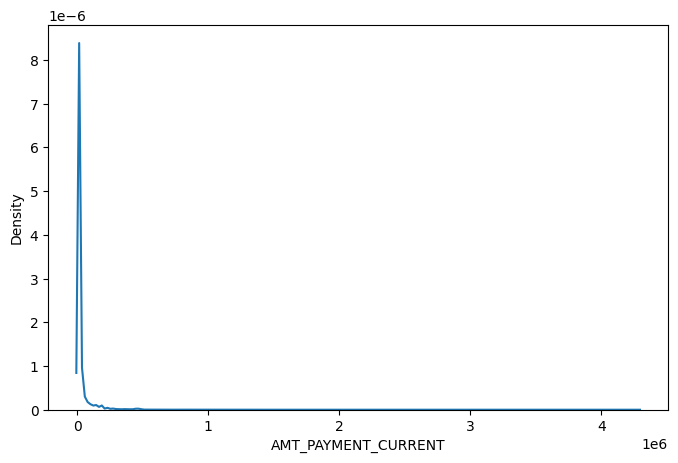

In [9]:
# kde plot of AMT_PAYMENT_CURRENT    
plt.figure(figsize=(8,5))
sns.kdeplot(credit_card_balance['AMT_PAYMENT_CURRENT'])
plt.show()

In [10]:
# filling missing values of AMT_PAYMENT_CURRENT with random sampling imputation 
missing_indices = credit_card_balance['AMT_PAYMENT_CURRENT'].isnull()
non_null_values = credit_card_balance['AMT_PAYMENT_CURRENT'].dropna().values
np.put(credit_card_balance['AMT_PAYMENT_CURRENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [11]:
missing_values(credit_card_balance)

,Total,Percent
AMT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_OTHER_CURRENT,749816,0.195249
CNT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_TOTAL_RECEIVABLE,0,0.000000


In [12]:
credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].value_counts()

AMT_DRAWINGS_ATM_CURRENT
0.000        2665718
4500.000       35851
9000.000       27726
45000.000      22946
2250.000       22854
              ...   
72720.000          1
85725.000          1
43984.215          1
44134.830          1
33538.725          1
Name: count, Length: 2267, dtype: int64

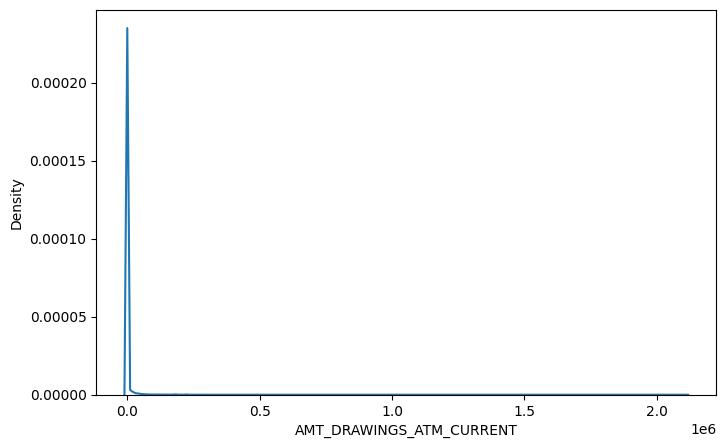

In [13]:
# kde plot of AMT_DRAWINGS_ATM_CURRENT
plt.figure(figsize=(8,5))
sns.kdeplot(credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'])
plt.show()

In [14]:
# filling missing values of AMT_DRAWINGS_ATM_CURRENT with random sampling imputation 
missing_indices = credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].isnull()
non_null_values = credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].dropna().values
np.put(credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

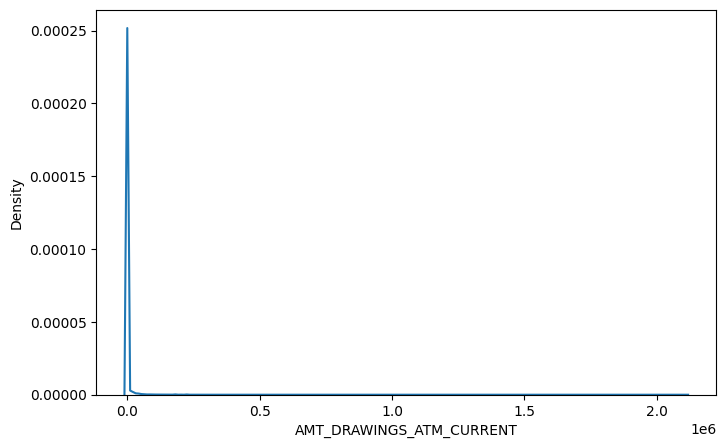

In [15]:
# kde plot of AMT_DRAWINGS_ATM_CURRENT
plt.figure(figsize=(8,5))
sns.kdeplot(credit_card_balance['AMT_DRAWINGS_ATM_CURRENT'])
plt.show()

In [16]:
missing_values(credit_card_balance)

,Total,Percent
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_RECIVABLE,0,0.000000
SK_DPD,0,0.000000


In [17]:
credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].value_counts()

CNT_DRAWINGS_ATM_CURRENT
0.0     2665718
1.0      213460
2.0       95647
3.0       46730
4.0       26335
5.0       14910
6.0        9179
7.0        5718
8.0        3992
9.0        2427
10.0       1876
11.0       1164
12.0        826
13.0        604
14.0        442
15.0        345
16.0        274
17.0        188
18.0        157
19.0        112
20.0         96
21.0         66
22.0         49
23.0         32
24.0         24
25.0         20
27.0         17
28.0         15
26.0         12
29.0         12
31.0         11
30.0          9
33.0          5
35.0          4
34.0          4
36.0          3
38.0          3
39.0          2
41.0          2
37.0          2
44.0          1
51.0          1
43.0          1
32.0          1
Name: count, dtype: int64

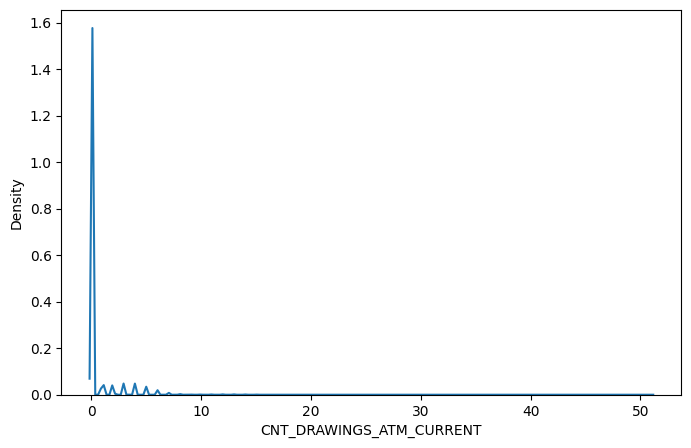

In [18]:
# kde plot of CNT_DRAWINGS_ATM_CURRENT
plt.figure(figsize=(8,5))
sns.kdeplot(credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'])
plt.show()

In [19]:
# filling missing values of CNT_DRAWINGS_ATM_CURRENT with random sampling imputation 
missing_indices = credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].isnull()
non_null_values = credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].dropna().values
np.put(credit_card_balance['CNT_DRAWINGS_ATM_CURRENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [20]:
missing_values(credit_card_balance)

,Total,Percent
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_RECIVABLE,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000


In [21]:
# filling missing values of CNT_DRAWINGS_OTHER_CURRENT with random sampling imputation
missing_indices = credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].isnull()
non_null_values = credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].dropna().values
np.put(credit_card_balance['CNT_DRAWINGS_OTHER_CURRENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [22]:
missing_values(credit_card_balance)

,Total,Percent
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_RECIVABLE,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
CNT_DRAWINGS_OTHER_CURRENT,0,0.000000


In [23]:
# filling missing values of CNT_DRAWINGS_POS_CURRENT with random sampling imputation
missing_indices = credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].isnull()
non_null_values = credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].dropna().values
np.put(credit_card_balance['CNT_DRAWINGS_POS_CURRENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [24]:
missing_values(credit_card_balance)

,Total,Percent
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_RECIVABLE,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
CNT_DRAWINGS_POS_CURRENT,0,0.000000
CNT_DRAWINGS_OTHER_CURRENT,0,0.000000


In [25]:
# filling missing values of AMT_DRAWINGS_OTHER_CURRENT with random sampling imputation
missing_indices = credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].isnull()
non_null_values = credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].dropna().values
np.put(credit_card_balance['AMT_DRAWINGS_OTHER_CURRENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [26]:
missing_values(credit_card_balance)

,Total,Percent
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_RECIVABLE,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
CNT_DRAWINGS_POS_CURRENT,0,0.000000
CNT_DRAWINGS_OTHER_CURRENT,0,0.000000
CNT_DRAWINGS_CURRENT,0,0.000000


In [27]:
# filling missing values of AMT_DRAWINGS_POS_CURRENT with random sampling imputation    
missing_indices = credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].isnull()
non_null_values = credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].dropna().values
np.put(credit_card_balance['AMT_DRAWINGS_POS_CURRENT'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [28]:
missing_values(credit_card_balance)

,Total,Percent
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_RECEIVABLE_PRINCIPAL,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
CNT_DRAWINGS_POS_CURRENT,0,0.000000
CNT_DRAWINGS_OTHER_CURRENT,0,0.000000
CNT_DRAWINGS_CURRENT,0,0.000000
CNT_DRAWINGS_ATM_CURRENT,0,0.000000


In [29]:
credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].value_counts()

CNT_INSTALMENT_MATURE_CUM
0.0      551467
5.0       91691
2.0       91035
4.0       89941
6.0       89829
          ...  
116.0         6
117.0         4
118.0         3
119.0         2
120.0         1
Name: count, Length: 121, dtype: int64

In [30]:
# filling missing values of CNT_INSTALMENT_MATURE_CUM with random sampling imputation
missing_indices = credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].isnull()
non_null_values = credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].dropna().values
np.put(credit_card_balance['CNT_INSTALMENT_MATURE_CUM'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [31]:
missing_values(credit_card_balance)

,Total,Percent
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000
AMT_RECEIVABLE_PRINCIPAL,0,0.000000
SK_DPD,0,0.000000
NAME_CONTRACT_STATUS,0,0.000000
CNT_INSTALMENT_MATURE_CUM,0,0.000000
CNT_DRAWINGS_POS_CURRENT,0,0.000000
CNT_DRAWINGS_OTHER_CURRENT,0,0.000000
CNT_DRAWINGS_CURRENT,0,0.000000
CNT_DRAWINGS_ATM_CURRENT,0,0.000000


In [32]:
# filling missing values of AMT_INST_MIN_REGULARITY with random sampling imputation
missing_indices = credit_card_balance['AMT_INST_MIN_REGULARITY'].isnull()
non_null_values = credit_card_balance['AMT_INST_MIN_REGULARITY'].dropna().values
np.put(credit_card_balance['AMT_INST_MIN_REGULARITY'].values, np.where(missing_indices)[0], np.random.choice(non_null_values, size=len(credit_card_balance[missing_indices])))

In [33]:
missing_values(credit_card_balance)

,Total,Percent
SK_ID_PREV,0,0.0
AMT_RECEIVABLE_PRINCIPAL,0,0.0
SK_DPD,0,0.0
NAME_CONTRACT_STATUS,0,0.0
CNT_INSTALMENT_MATURE_CUM,0,0.0
CNT_DRAWINGS_POS_CURRENT,0,0.0
CNT_DRAWINGS_OTHER_CURRENT,0,0.0
CNT_DRAWINGS_CURRENT,0,0.0
CNT_DRAWINGS_ATM_CURRENT,0,0.0
AMT_TOTAL_RECEIVABLE,0,0.0


- **There is no missing values in the credit_card_balance dataset**

In [34]:
# save the cleaned credit card balance data to a new CSV file
credit_card_balance.to_csv('cleaned_credit_card_balance_data.csv', index=False)